In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
df = pd.read_csv(r"C:\Users\kulla\Desktop\Projects\Mini Project\Datasets\heart_2020\heart_2020_cleaned.csv")  # Replace with actual dataset path
df = df.dropna()

# Separate numerical and categorical columns


In [3]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


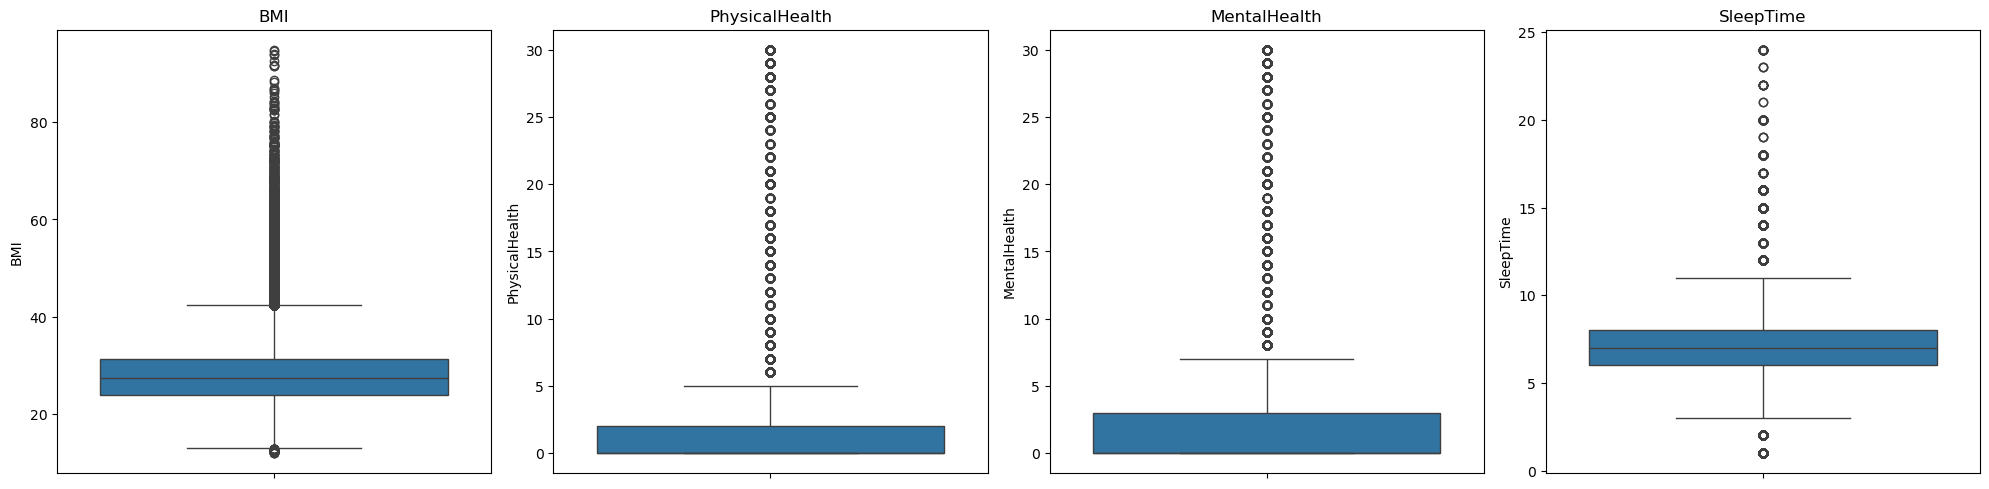

In [11]:
import seaborn as sns
numerical_features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

# Create subplots
num_features = len(numerical_features)
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(5*num_features, 5))

# Plot each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()


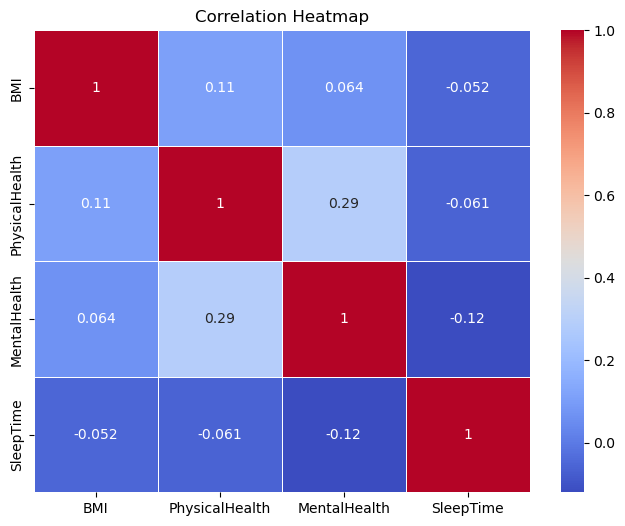

In [12]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [13]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Convert categorical columns to numerical
label_encoders = {}
onehot_encoder = OneHotEncoder(sparse_output=False, drop="first")


for col in cat_cols:
    if df[col].nunique() == 2:  # Use LabelEncoder for binary categorical features
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:  # Use OneHotEncoder for multi-class categorical features
        encoded_cols = onehot_encoder.fit_transform(df[[col]])
        df = df.drop(col, axis=1)
        df = pd.concat([df, pd.DataFrame(encoded_cols, columns=[f"{col}_{i}" for i in range(encoded_cols.shape[1])])], axis=1)
 # Convert target variable to numeric




In [14]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory_0', 'AgeCategory_1', 'AgeCategory_2',
       'AgeCategory_3', 'AgeCategory_4', 'AgeCategory_5', 'AgeCategory_6',
       'AgeCategory_7', 'AgeCategory_8', 'AgeCategory_9', 'AgeCategory_10',
       'AgeCategory_11', 'Race_0', 'Race_1', 'Race_2', 'Race_3', 'Race_4',
       'Diabetic_0', 'Diabetic_1', 'Diabetic_2', 'GenHealth_0', 'GenHealth_1',
       'GenHealth_2', 'GenHealth_3'],
      dtype='object')

In [15]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_2,Race_3,Race_4,Diabetic_0,Diabetic_1,Diabetic_2,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_2,Race_3,Race_4,Diabetic_0,Diabetic_1,Diabetic_2,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,0.775362,...,0.085824,0.034172,0.766779,0.021204,0.127588,0.008002,0.108435,0.291215,0.035301,0.356034
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,0.417344,...,0.280104,0.181671,0.422883,0.144065,0.333631,0.089095,0.310930,0.454323,0.184539,0.478826
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
# Apply MinMaxScaler to features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(df.head(5))
# Apply SMOTE to handle class imbalance


   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  PhysicalActivity  ...  Race_2  Race_3  \
0          30.0            0    0                 1  ...     0.0     0.0   
1           0.0            0    0                 1  ...     0.0     0.0   
2          30.0            0    1                 1  ...     0.0     0.0   
3           0.0            0    0                 0  ...     0.0     0.0   
4           0.0            1    0                 1  ...     0.0     0.0   

   Race_4  Diabetic_0  Diabetic_1  Diabetic_2  GenHealth_0  GenHealth_1  \
0     1.0  

In [18]:
df['HeartDisease'].value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

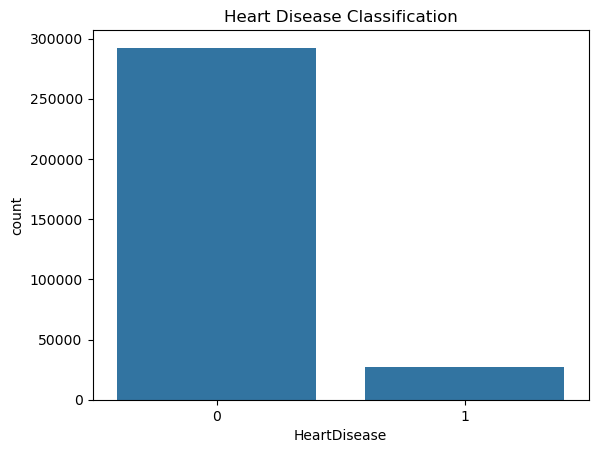

In [19]:
import seaborn as sns
sns.countplot(x=df['HeartDisease'])
plt.title("Heart Disease Classification")
plt.show()

In [22]:
X_scaled

array([[0.05529398, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.1004467 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.17578172, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.14753109, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.25099602, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.41699867, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

Metrics for Neural Network (Deep NN):
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     58367
           1       0.22      0.79      0.35      5592

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.79     63959





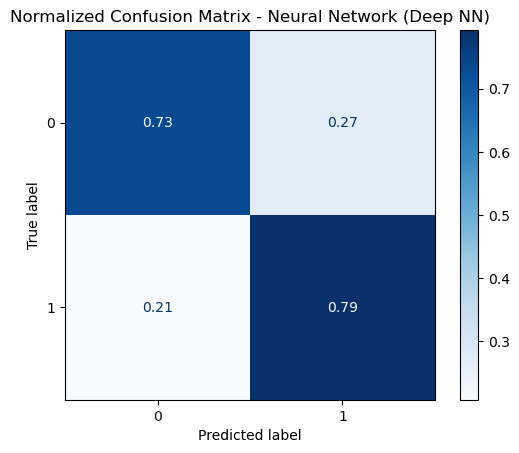

Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     58367
           1       0.23      0.78      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959





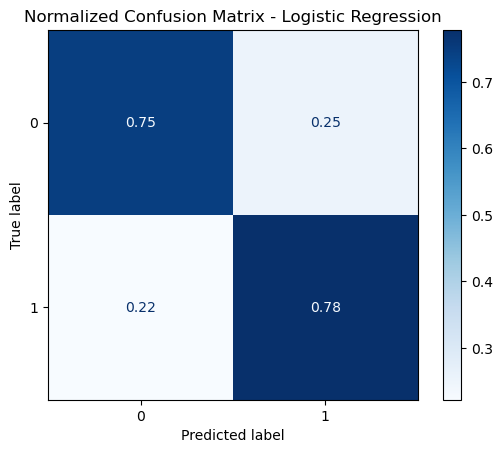

Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     58367
           1       0.20      0.76      0.32      5592

    accuracy                           0.72     63959
   macro avg       0.58      0.73      0.57     63959
weighted avg       0.90      0.72      0.78     63959





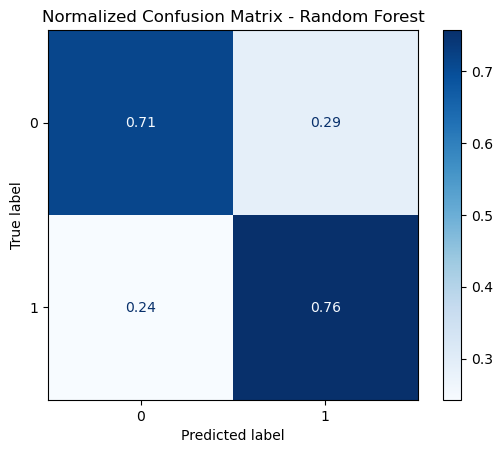

Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.68      0.80     58367
           1       0.17      0.66      0.27      5592

    accuracy                           0.68     63959
   macro avg       0.56      0.67      0.53     63959
weighted avg       0.89      0.68      0.75     63959





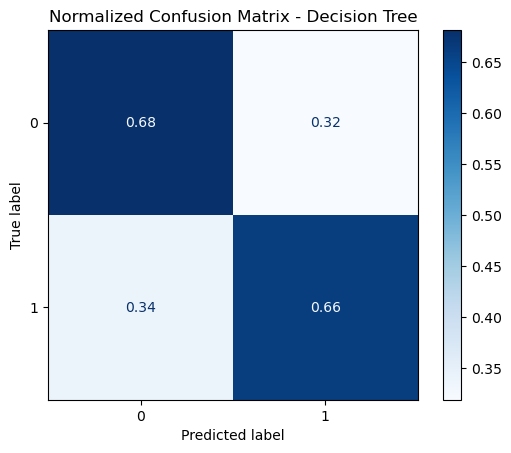

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:06:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58367
           1       0.22      0.78      0.35      5592

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.80     63959





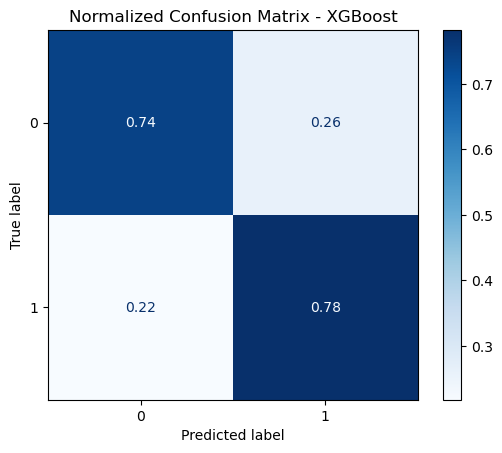

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for MLP Classifier (Simple):
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     58367
           1       0.20      0.77      0.32      5592

    accuracy                           0.71     63959
   macro avg       0.59      0.74      0.57     63959
weighted avg       0.90      0.71      0.77     63959





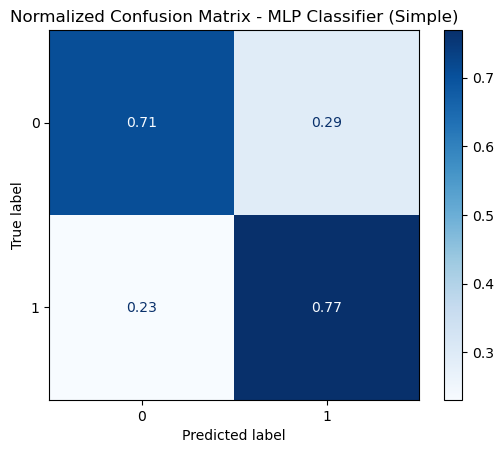

                          Accuracy  Precision    Recall  F1-Score       AUC
Neural Network (Deep NN)  0.737519   0.907794  0.737519  0.792975  0.837218
Logistic Regression       0.749621   0.907180  0.749621  0.801745  0.836945
Random Forest             0.716037   0.901314  0.716037  0.776739  0.805145
Decision Tree             0.679576   0.885739  0.679576  0.748791  0.672298
XGBoost                   0.744258   0.907181  0.744258  0.797852  0.835428
MLP Classifier (Simple)   0.712128   0.902449  0.712128  0.773894  0.810643


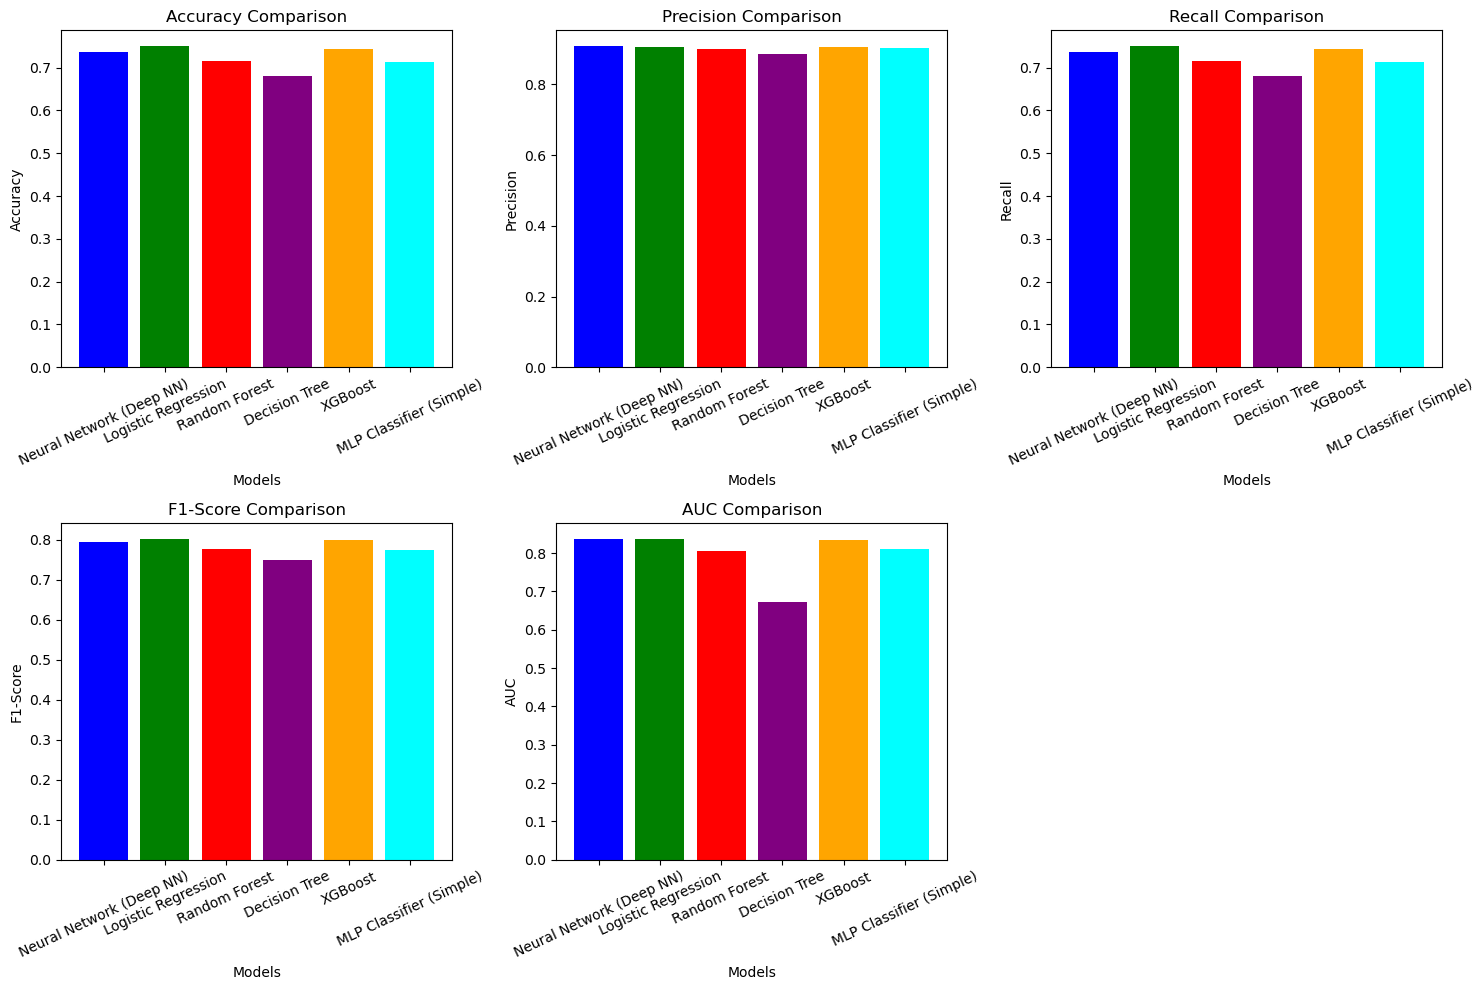

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# First split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train_full, y_train_full)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_under)
X_test = scaler.transform(X_test_full)
y_train = y_train_under
y_test = y_test_full


models = {
    "Neural Network (Deep NN)": MLPClassifier(
        random_state=1,
        max_iter=400,
        learning_rate_init=0.005,
        learning_rate='constant',
        hidden_layer_sizes=(8, 4, 4),
        activation='relu'
    ),
    
    "Logistic Regression": LogisticRegression(
        random_state=1,
        max_iter=400,
        solver='lbfgs',
        n_jobs=-1,
        C=0.1
    ),
    
    "Random Forest": RandomForestClassifier(
        random_state=1,
        max_features='sqrt',
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced'
    ),
    
    "Decision Tree": DecisionTreeClassifier(
        random_state=1,
        splitter='random',
        criterion='entropy',
        class_weight='balanced'
    ),
    
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric="mlogloss",
        random_state=1,
        learning_rate=0.05,
        n_estimators=100,
        tree_method='exact'
    ),
    
    "MLP Classifier (Simple)": MLPClassifier(
        random_state=1,
        hidden_layer_sizes=(50, 50),
        max_iter=100
    )
}

# Add Neural Network separately
def create_nn(input_dim):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # multiclass output
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
    return model

# Store results
results = {}

# Train models and evaluate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        if y_prob.shape[1] == 2:
            y_prob = y_prob[:, 1]
    else:
        y_prob = None

    print(f"Metrics for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.title(f"Normalized Confusion Matrix - {name}")
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    if y_prob is not None:
        if len(np.unique(y)) == 2:  # binary classification
            roc_auc = roc_auc_score(y_test, y_prob)
        else:  # multiclass
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        roc_auc = np.nan

    results[name] = [accuracy, precision, recall, f1, roc_auc]




# Final Results
# ------------------------------
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]).T
print(results_df)

# ------------------------------
# Plot metrics comparison
# ------------------------------
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]

plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()


Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.54      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.91      0.89     63959





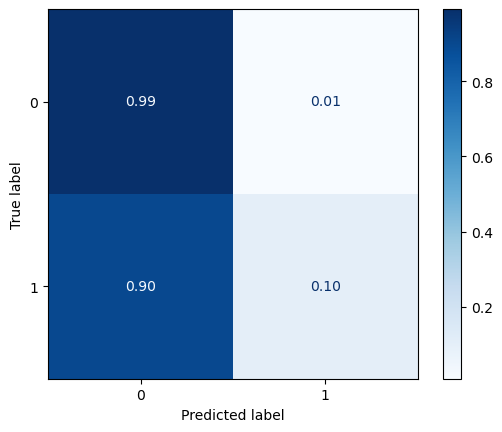

Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.34      0.12      0.18      5592

    accuracy                           0.90     63959
   macro avg       0.63      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959





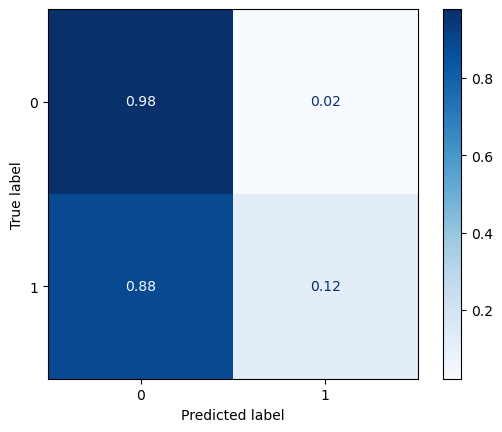

Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     58367
           1       0.23      0.24      0.24      5592

    accuracy                           0.86     63959
   macro avg       0.58      0.58      0.58     63959
weighted avg       0.87      0.86      0.86     63959





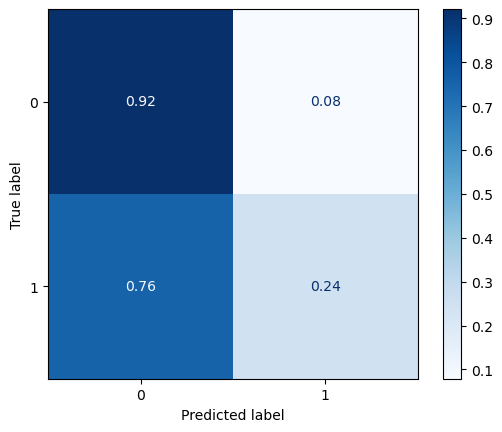

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:45:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.53      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.72      0.54      0.56     63959
weighted avg       0.89      0.91      0.89     63959





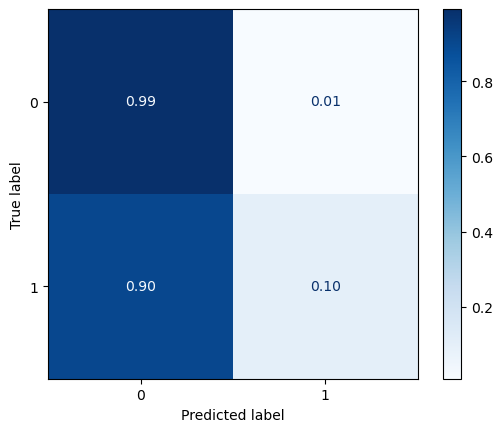

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for MLP Classifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.47      0.11      0.18      5592

    accuracy                           0.91     63959
   macro avg       0.70      0.55      0.57     63959
weighted avg       0.88      0.91      0.89     63959





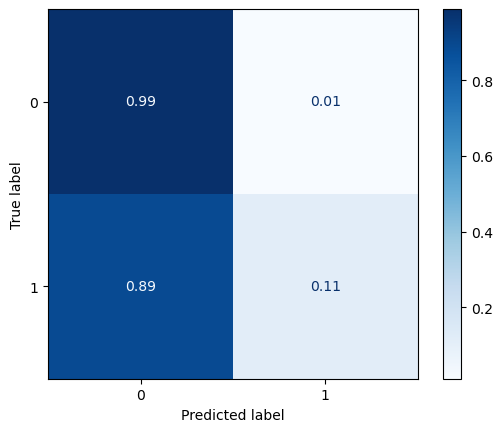

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.913867   0.539789  0.100680  0.169706  0.836488
Random Forest        0.903016   0.343734  0.120172  0.178084  0.783145
Decision Tree        0.862162   0.229439  0.244456  0.236710  0.584119
XGBoost              0.913491   0.528338  0.098355  0.165837  0.833212
MLP Classifier       0.911506   0.474203  0.111767  0.180897  0.829065


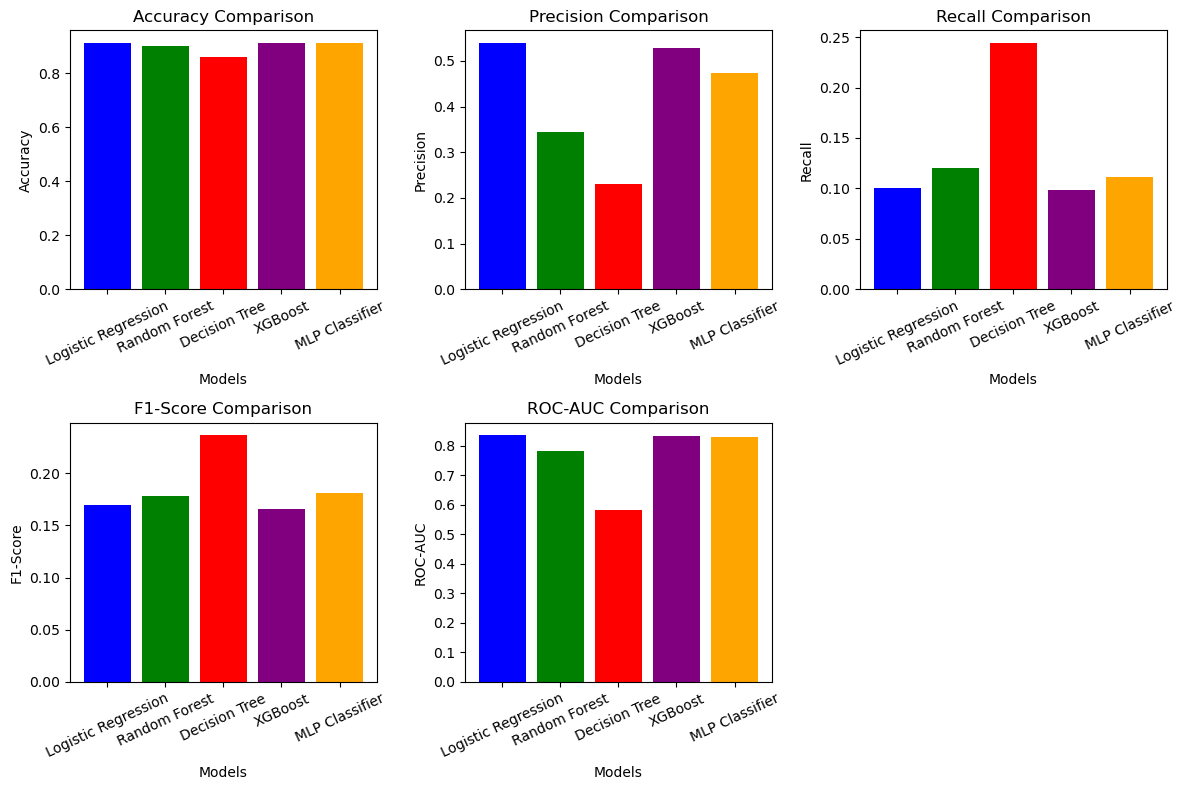

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
     "Decision Tree": DecisionTreeClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

# Store results
results = {}

# Train models and evaluate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores
    print(f"Metrics for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Display the normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store in dictionary
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]).T
print(results_df)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()


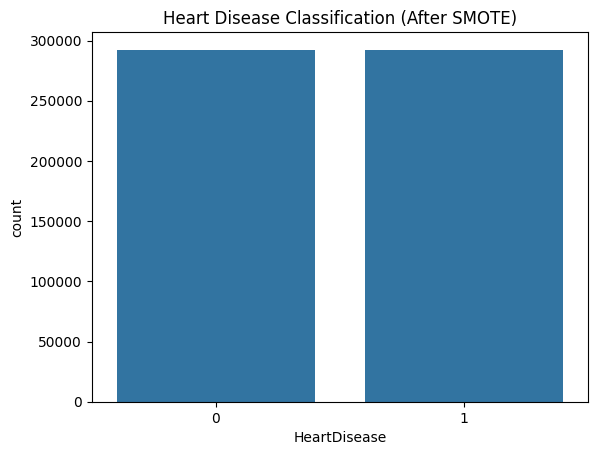

In [15]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Convert y_resampled to a DataFrame for visualization
df_resampled = pd.DataFrame(y_resampled, columns=['HeartDisease'])

# Plot the class distribution after SMOTE
sns.countplot(x=df_resampled['HeartDisease'])
plt.title("Heart Disease Classification (After SMOTE)")
plt.show()


Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76     58485
           1       0.75      0.78      0.77     58484

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969





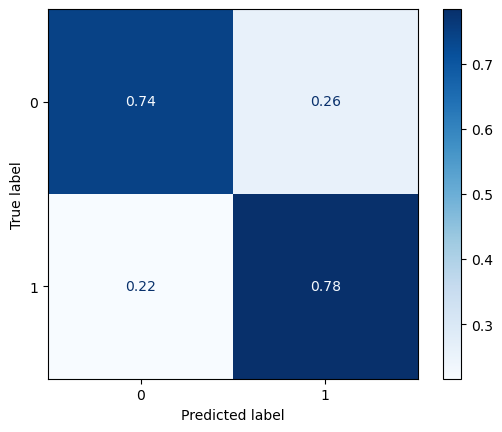

Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     58485
           1       0.92      0.92      0.92     58484

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969





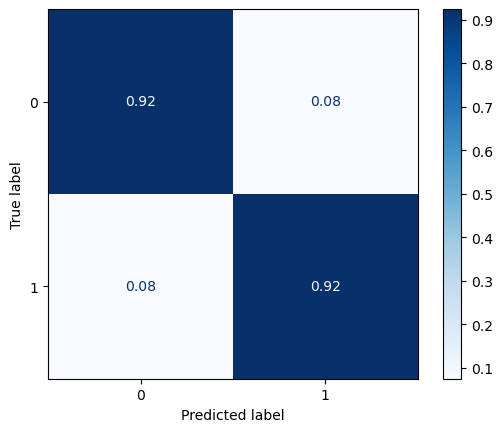

Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     58485
           1       0.89      0.89      0.89     58484

    accuracy                           0.89    116969
   macro avg       0.89      0.89      0.89    116969
weighted avg       0.89      0.89      0.89    116969





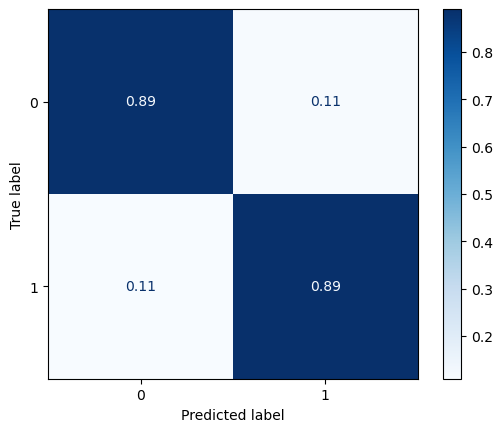

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:59:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     58485
           1       0.94      0.88      0.91     58484

    accuracy                           0.91    116969
   macro avg       0.91      0.91      0.91    116969
weighted avg       0.91      0.91      0.91    116969





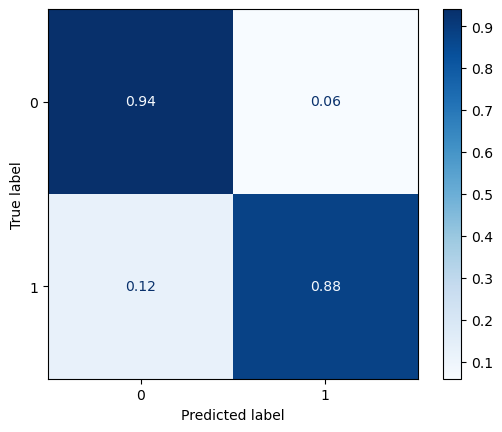

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for MLP Classifier:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81     58485
           1       0.80      0.84      0.82     58484

    accuracy                           0.82    116969
   macro avg       0.82      0.82      0.82    116969
weighted avg       0.82      0.82      0.82    116969





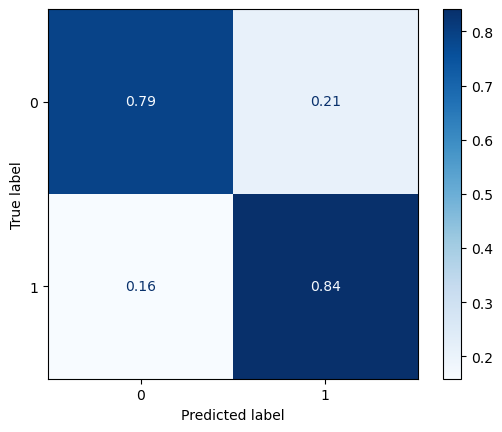

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.763065   0.752586  0.783804  0.767878  0.838968
Random Forest        0.923287   0.922182  0.924595  0.923387  0.971271
Decision Tree        0.888423   0.886670  0.890688  0.888675  0.889145
XGBoost              0.909429   0.936729  0.878172  0.906506  0.970989
MLP Classifier       0.815703   0.800488  0.841016  0.820252  0.902094


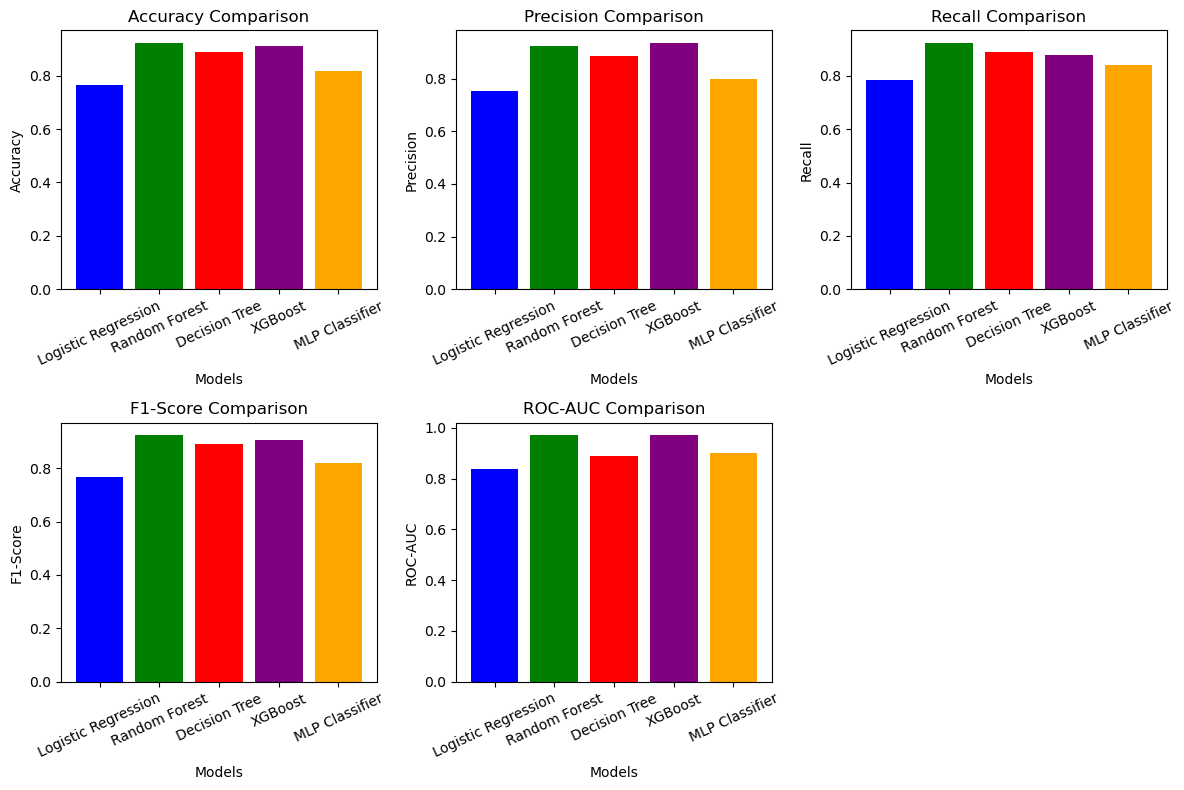

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
     "Decision Tree": DecisionTreeClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

# Store results
results = {}

# Train models and evaluate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores
    print(f"Metrics for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Display the normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store in dictionary
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]).T
print(results_df)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()


In [16]:
import shap

# Assuming X_scaled is a NumPy array and y is your target
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# SHAP explanation
explainer = shap.TreeExplainer(rf_model)

In [18]:
# Get random sample indices
sample_size = min(100, X_test.shape[0])
sample_idx = np.random.choice(X_test.shape[0], size=sample_size, replace=False)

In [19]:
# Compute SHAP values
shap_values = explainer.shap_values(X_test[sample_idx])

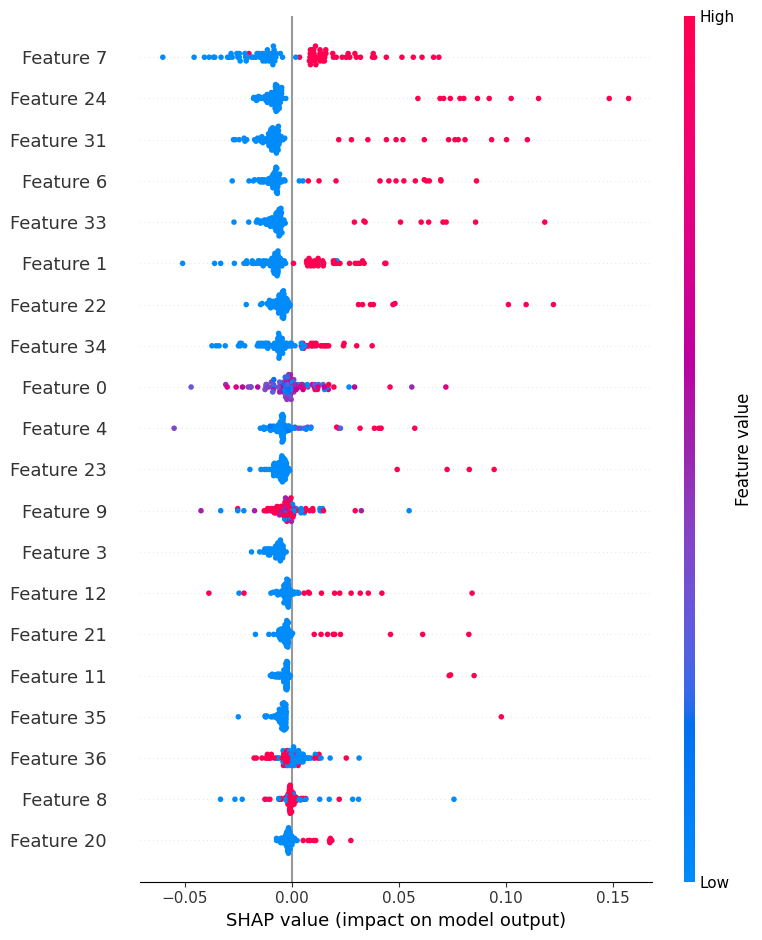

In [24]:
# Convert list of arrays into a single array
shap_array = np.stack(shap_values)  # shape: (100, 37, 2)

# Select class 1 SHAP values
shap_class_1 = shap_array[:, :, 1]  # shape: (100, 37)

# Now this matches X_test shape
shap.summary_plot(shap_class_1, X_test[sample_idx],
                  feature_names=[f"Feature {i}" for i in range(X_test.shape[1])])


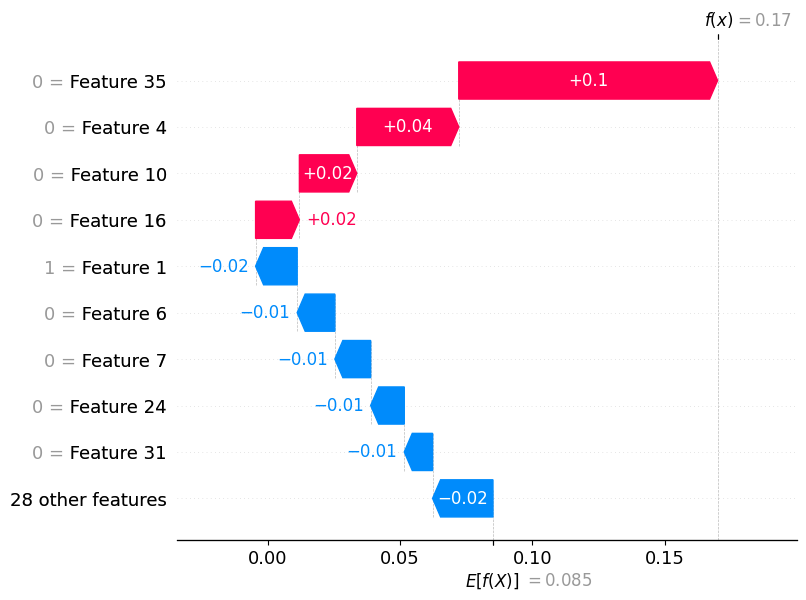

In [25]:
# 2. Select a sample index to plot
sample_index = 0  # you can change this to any index from 0 to 99

# 3. Extract SHAP values for class 1 for that sample
shap_vals_sample = shap_array[sample_index, :, 1]  # shape: (37,)

# 4. Get the corresponding input features for that sample
features_sample = X_test[sample_index]  # shape: (37,)
feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]

# 5. Create a SHAP Explanation object (required by waterfall_plot)
explanation = shap.Explanation(
    values=shap_vals_sample,
    base_values=explainer.expected_value[1],  # expected_value for class 1
    data=features_sample,
    feature_names=feature_names
)

# 6. Plot waterfall
shap.plots.waterfall(explanation)


KeyboardInterrupt: 

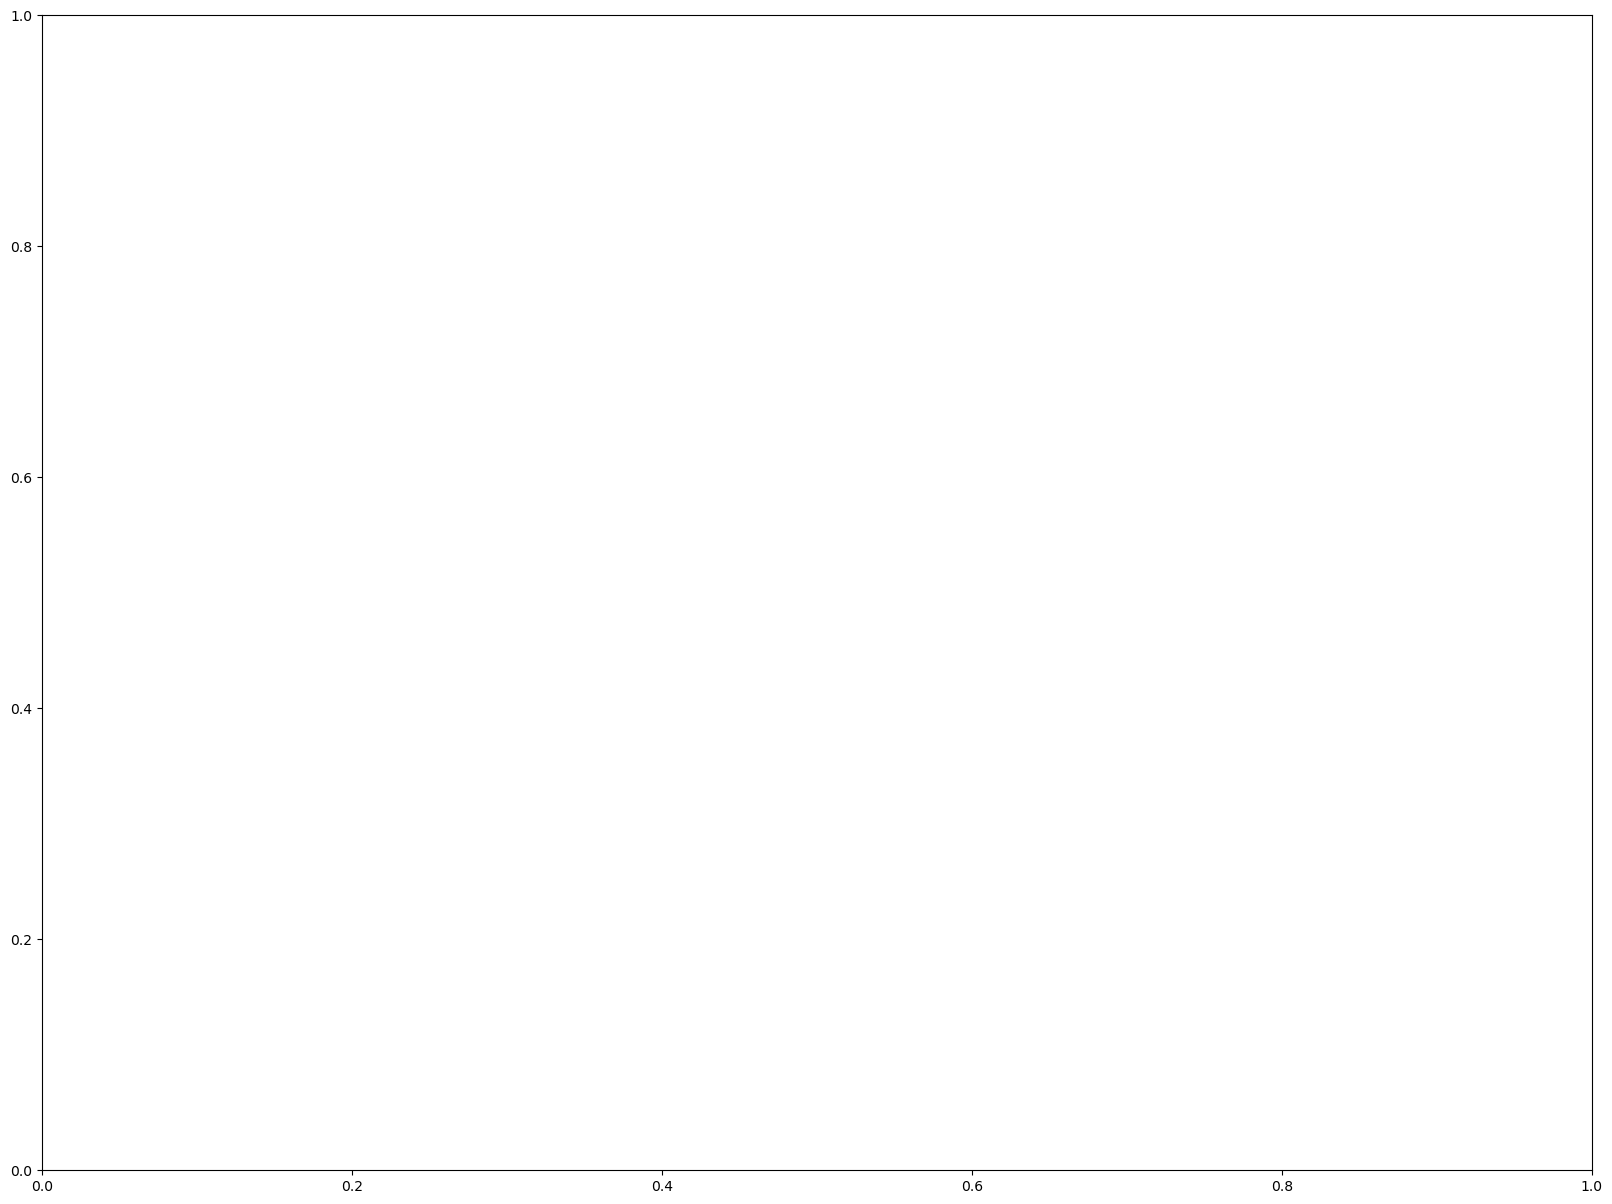

In [33]:
from sklearn.inspection import PartialDependenceDisplay

# === Save feature names ===
feature_names = X.columns.tolist()

# === Scale features ===
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# === Balance the dataset using SMOTE ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# === Split into training and testing sets ===
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# === Train the Random Forest model ===
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# === Select features for PDP ===
# You can choose specific features like ['BMI', 'Age'], or plot all
features_to_plot = range(X.shape[1])  # or feature_names[:3] for top 3

# === Plot Partial Dependence ===
fig, ax = plt.subplots(figsize=(20, 15))  # Customize size

PartialDependenceDisplay.from_estimator(
    rf_model,
    X_test,
    features=features_to_plot,
    feature_names=feature_names,
    ax=ax
)

plt.suptitle("Partial Dependence Plots - Random Forest", fontsize=16)
plt.tight_layout()
plt.show()
